### PART 0 : Import Libraries and import/read our Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for statistics use
import datetime as dt #for manipulation of data
df=pd.read_csv("Cuisine_rating.csv")



### PART I : Data Exploration

In [2]:
df.head()


,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### PART 2: DATA MANIPULATION

#### 2.A: Checking for data duplicates

In [3]:
df.drop_duplicates()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


#### 2.B: Data Cleaning

In [4]:
df.dtypes


User ID             int64
Area code           int64
Location           object
Gender             object
YOB                 int64
Marital Status     object
Activity           object
Budget              int64
Cuisines           object
Alcohol            object
Smoker             object
Food Rating         int64
Service Rating      int64
Overall Rating    float64
Often A S          object
dtype: object

In [5]:
df.select_dtypes(include=['int64','float64','category'])

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
0,1,153,2006,3,5,4,4.5
1,2,123,1991,3,1,1,1.0
2,3,122,1977,5,5,5,5.0
3,4,153,1956,5,3,1,2.0
4,5,129,1997,4,2,4,3.0
...,...,...,...,...,...,...,...
195,196,175,1982,4,1,2,1.5
196,197,170,2000,4,1,2,1.5
197,198,160,2006,5,5,2,3.5
198,199,130,2002,3,3,2,2.5


In [6]:
df['Date']=pd.to_datetime(df['YOB'],format="%Y")
df['Date']

0     2006-01-01
1     1991-01-01
2     1977-01-01
3     1956-01-01
4     1997-01-01
         ...    
195   1982-01-01
196   2000-01-01
197   2006-01-01
198   2002-01-01
199   2005-01-01
Name: Date, Length: 200, dtype: datetime64[ns]

In [7]:
df[['city_name','abb']]=df.Location.str.split(",",expand=True)
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Date,city_name,abb
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,2006-01-01,Upper East Side,NY
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,1991-01-01,St. George,NY
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,1977-01-01,Upper West Side,NY
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,1956-01-01,Upper East Side,NY
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,1997-01-01,Central Park,NY


In [ ]:
#ALTERNATIVES

# Sol 1   df.rename(columns={'Alcohol ':'Alcohol'},inplace=True)
# Sol 2   df.columns=df.columns.str.rstrip()
# Sol 3   df.rename(columns = lambda x: x.strip(' '))
# Sol 4   df.columns = df.columns.str.replace('_x','')

### MISSING VALUES

In [9]:
df2=pd.read_csv("top_movies.csv")

In [10]:
df2.head()

,movie_name,genre,description
0,The Shawshank Redemption,"Drama, Crime",Imprisoned in the 1940s for the double murder ...
1,The Godfather,"Drama, Crime","Spanning the years 1945 to 1955, a chronicle o..."
2,The Godfather Part II,"Drama, Crime",In the continuing saga of the Corleone crime f...
3,Schindler's List,"Drama, History, War",The true story of how businessman Oskar Schind...
4,12 Angry Men,Drama,The defense and the prosecution have rested an...


In [11]:
df2.isnull().sum()

movie_name     0
genre          3
description    0
dtype: int64

In [12]:
df2[df2['genre'].isnull()]

,movie_name,genre,description
3122,Return,NaN,Return is a methodical construction of the app...
5520,Return,NaN,Eyüp decides to cross mount Ararat looking for...
5570,Return,NaN,Static images of an old country house are comb...


In [13]:
df2['genre'].mode()

0    Drama
Name: genre, dtype: object

In [14]:
df2['fill']=df2['genre'].fillna(df2['genre'].mode()[0])
df2[df2['genre'].isnull()]

,movie_name,genre,description,fill
3122,Return,NaN,Return is a methodical construction of the app...,Drama
5520,Return,NaN,Eyüp decides to cross mount Ararat looking for...,Drama
5570,Return,NaN,Static images of an old country house are comb...,Drama


In [15]:
df2.loc[3122,'fill']

'Drama'

In [16]:
df2.drop(columns='genre')

,movie_name,description,fill
0,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,"Drama, Crime"
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama, Crime"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"Drama, Crime"
3,Schindler's List,The true story of how businessman Oskar Schind...,"Drama, History, War"
4,12 Angry Men,The defense and the prosecution have rested an...,Drama
...,...,...,...
9415,The Misfits,After being recruited by a group of unconventi...,"Action, Thriller"
9416,A Serbian Film,Retired porn star Milos leads a normal family ...,"Crime, Horror, Thriller"
9417,The Night Before the Exams Today,"In 2006, as World Cup fever sweeps Italy, high...",Comedy
9418,Problemos,"When a pandemic strikes the world, Victor and ...",Comedy


In [17]:
df2.dropna()

,movie_name,genre,description,fill
0,The Shawshank Redemption,"Drama, Crime",Imprisoned in the 1940s for the double murder ...,"Drama, Crime"
1,The Godfather,"Drama, Crime","Spanning the years 1945 to 1955, a chronicle o...","Drama, Crime"
2,The Godfather Part II,"Drama, Crime",In the continuing saga of the Corleone crime f...,"Drama, Crime"
3,Schindler's List,"Drama, History, War",The true story of how businessman Oskar Schind...,"Drama, History, War"
4,12 Angry Men,Drama,The defense and the prosecution have rested an...,Drama
...,...,...,...,...
9415,The Misfits,"Action, Thriller",After being recruited by a group of unconventi...,"Action, Thriller"
9416,A Serbian Film,"Crime, Horror, Thriller",Retired porn star Milos leads a normal family ...,"Crime, Horror, Thriller"
9417,The Night Before the Exams Today,Comedy,"In 2006, as World Cup fever sweeps Italy, high...",Comedy
9418,Problemos,Comedy,"When a pandemic strikes the world, Victor and ...",Comedy


##  PATTERNS & RELATIONS: SEABORN DATA VIZ

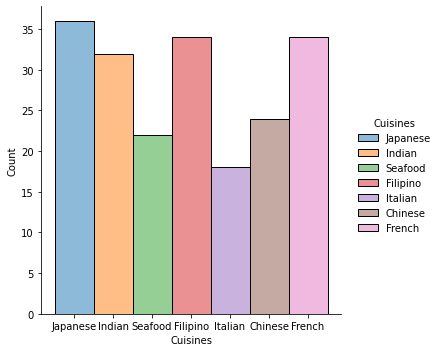

In [18]:
#First question: how many survey respondents by Cuisines?
sns.displot(data=df,x='Cuisines',kind='hist',hue='Cuisines')

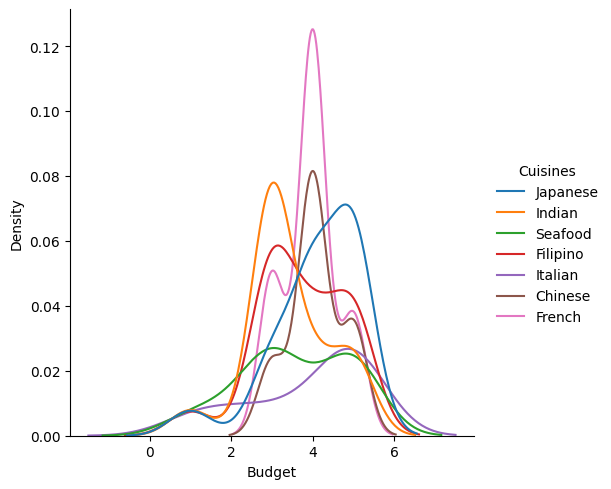

In [19]:
sns.displot(data=df,kind='kde',x='Budget',hue='Cuisines')

In [20]:
df.groupby(['Cuisines','Budget']).sum()

User ID  Area code    YOB  Food Rating  Service Rating  \
Cuisines Budget                                                           
Chinese  3           396        513   7962           10              14   
         4          1440       2050  27746           45              45   
         5           528        774  11912           28              15   
Filipino 1           260        250   3996            2              10   
         3          1402       1940  27800           40              47   
         4           776       1187  15870           18              22   
         5          1134       1322  19810           32              36   
French   3           798       1135  15802           32              12   
         4          2326       2922  39670           54              63   
         5           738        737  11994           26              24   
Indian   1           164        313   3942            8               4   
         3          1920       2703  37749           57              67   
         4           630        838   9835           10              15   
         5           438        854  11972           14              28   
Italian  1           240        304   3996            4              10   
         2           214        299   3962           10              10   
         3           190        322   3938            8               2   
         4           230        305   3992           10              10   
         5           838       1330  19752           26              25   
Japanese 1           170        301   4002            9              10   
         3           390        868  11958           20              24   
         4          1320       1580  23944           55              42   
         5          1690       2348  31642           55              44   
Seafood  1           148        267   3948           10              10   
         2           182        271   4002            4               4   
         3           886       1032  15918           20              30   
         4           140        327   3918            6               2   
         5           512       1120  15934           31              21   

                 Overall Rating  
Cuisines Budget                  
Chinese  3                 12.0  
         4                 45.0  
         5                 21.5  
Filipino 1                  6.0  
         3                 43.5  
         4                 20.0  
         5                 34.0  
French   3                 22.0  
         4                 58.5  
         5                 25.0  
Indian   1                  6.0  
         3                 62.0  
         4                 12.5  
         5                 21.0  
Italian  1                  7.0  
         2                 10.0  
         3                  5.0  
         4                 10.0  
         5                 25.5  
Japanese 1                  9.5  
         3                 22.0  
         4                 48.5  
         5                 49.5  
Seafood  1                 10.0  
         2                  4.0  
         3                 25.0  
         4                  4.0  
         5                 26.0

<Figure size 800x400 with 0 Axes>

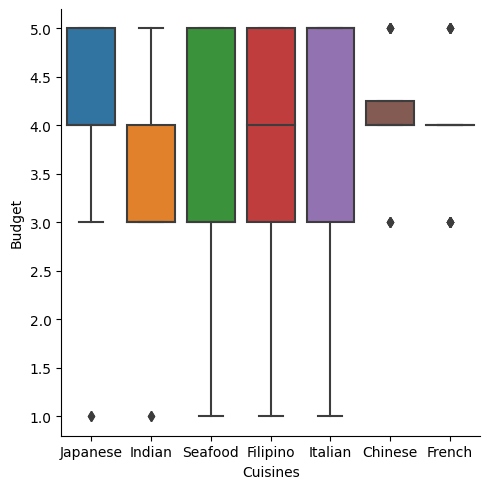

In [21]:
plt.figure(figsize=(8,4))
sns.catplot(kind='box',data=df,x='Cuisines',y='Budget')

In [22]:
df[(df['Cuisines']=='Japanese')&(df['Budget']==1)]

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Date,city_name,abb
34,35,129,"Central Park,NY",Male,2001,Divorced,Student,1,Japanese,Socially,Often,5,5,5.0,No,2001-01-01,Central Park,NY
134,135,172,"Central Park,NY",Male,2001,Divorced,Student,1,Japanese,Socially,Often,4,5,4.5,No,2001-01-01,Central Park,NY


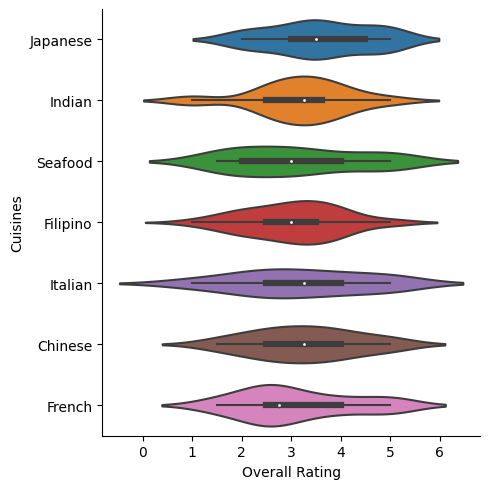

In [23]:
sns.catplot(data=df,kind='violin',x='Overall Rating',y='Cuisines')

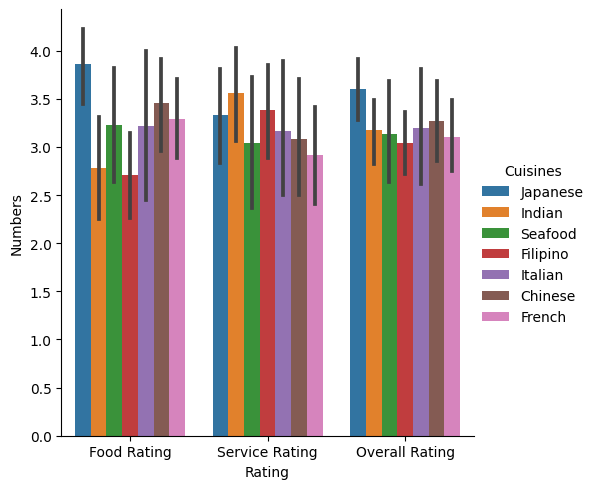

In [24]:
#Seaborn switch from wide form database to long form
df_melt= pd.melt(df, id_vars='Cuisines',value_vars=['Food Rating','Service Rating','Overall Rating'],
                 var_name='Rating',value_name='Numbers')
sns.catplot(data=df_melt,kind='bar',x='Rating',y='Numbers',hue='Cuisines')

### PART 3: DATA INSIGHT: spotting patterns and relations between different data 

#### Variables relations

In [25]:
tday=dt.date.today()
df['age']=[tday.year -i.year for i in df['Date']]
df.dtypes

User ID                    int64
Area code                  int64
Location                  object
Gender                    object
YOB                        int64
Marital Status            object
Activity                  object
Budget                     int64
Cuisines                  object
Alcohol                   object
Smoker                    object
Food Rating                int64
Service Rating             int64
Overall Rating           float64
Often A S                 object
Date              datetime64[ns]
city_name                 object
abb                       object
age                        int64
dtype: object

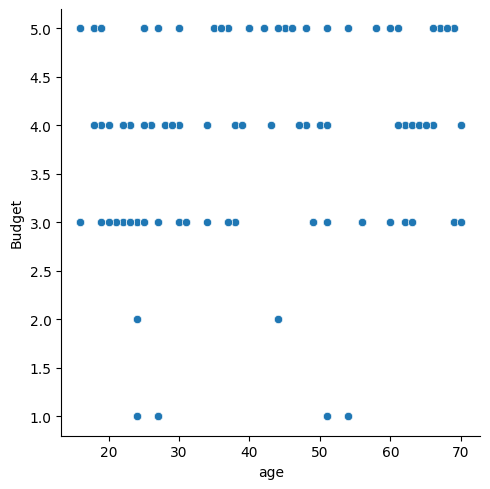

In [26]:
sns.relplot(data=df,kind='scatter',x='age',y='Budget')

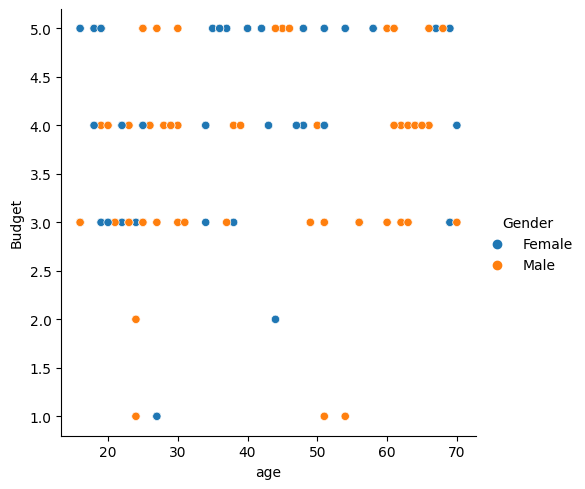

In [27]:
sns.relplot(data=df,kind='scatter',x='age',y='Budget',hue='Gender')

In [28]:
df[df['age']>=50].groupby(['Budget','Gender','age'])['Marital Status'].value_counts()

Budget  Gender  age  Marital Status
1       Male    51   Divorced          2
                54   Married           2
3       Female  56   Married           2
                69   Married           2
        Male    51   Married           2
                     Single            2
                56   Divorced          2
                     Single            2
                60   Married           2
                62   Single            2
                63   Married           2
                69   Married           2
                70   Married           2
4       Female  50   Married           2
                51   Married           2
                     Single            2
                70   Divorced          2
        Male    50   Married           2
                61   Married           2
                62   Married           2
                63   Married           2
                64   Married           4
                65   Married           2
                66   

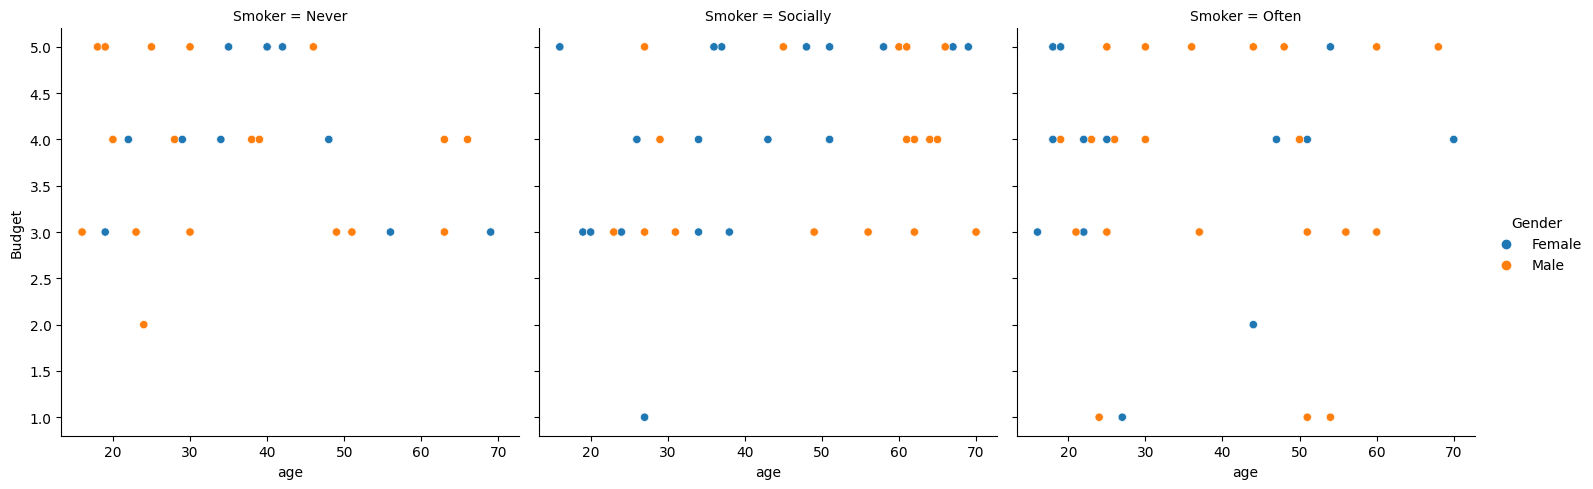

In [29]:
sns.relplot(data=df,kind='scatter',x='age',y='Budget',hue='Gender',col='Smoker')

In [ ]:
'''HEATMAP'''
num=df.select_dtypes(include=['int64','float64']).drop(columns=['User ID','YOB',
                                                                'Area code'])
num

,Budget,Food Rating,Service Rating,Overall Rating,age
0,3,5,4,4.5,19
1,3,1,1,1.0,34
2,5,5,5,5.0,48
3,5,3,1,2.0,69
4,4,2,4,3.0,28
...,...,...,...,...,...
195,4,1,2,1.5,43
196,4,1,2,1.5,25
197,5,5,2,3.5,19
198,3,3,2,2.5,23


<AxesSubplot: >

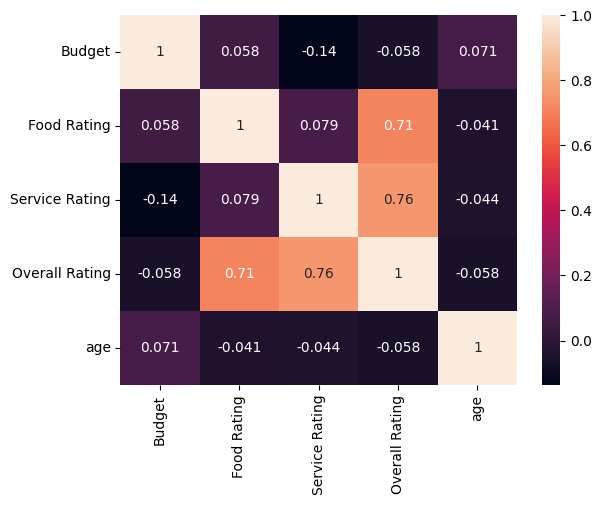

In [31]:
corr=num.corr()
sns.heatmap(corr,annot=True)

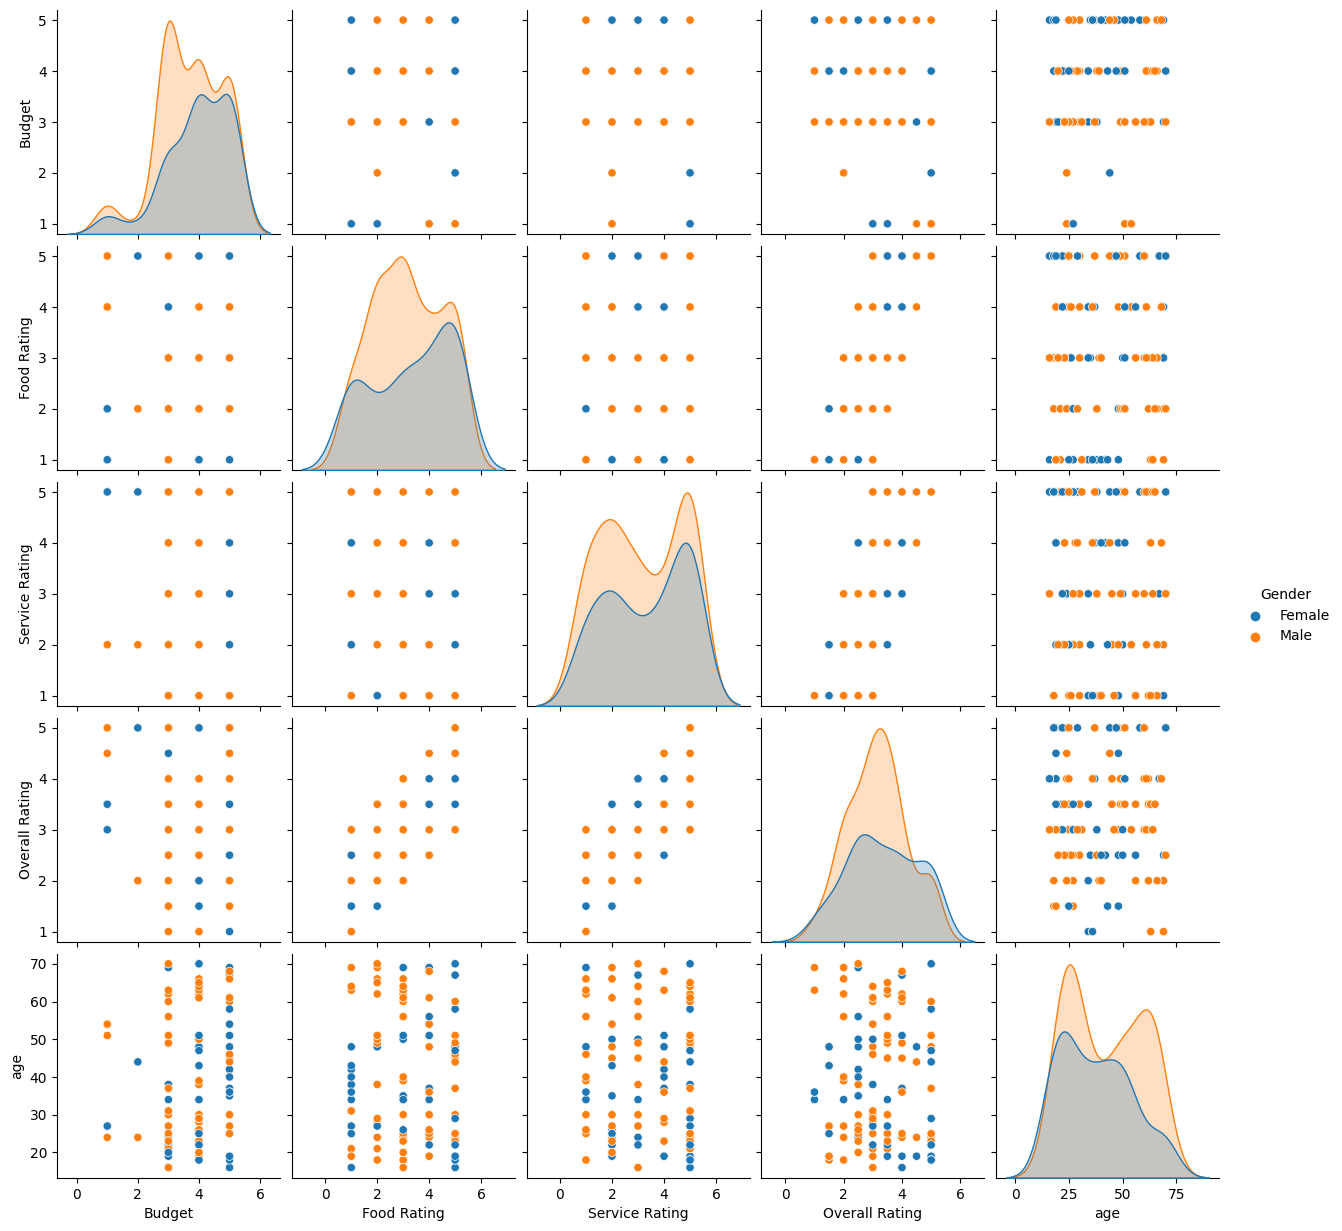

In [33]:
sns.pairplot(df,vars=num,hue='Gender')